#**Aula 1 de Labortório de Aprendizado de Máquina**
#Visualização e Pré-processamento de Dados



In [7]:
# Instalação manual de bibliotecas

!pip install numpy matplotlib pandas seaborn


## Imports das bibliotecas principais

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Análise das variáveis da base de dados (dados de classificação)

In [9]:
#Faz a leitura do arquivo com os dados
#header = None --> o arquivo não tem cabeçalho
#names --> coloca nomes para cada coluna
data = pd.read_csv('iris.data', header = None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']) #iris
# data = pd.read_csv('/content/abalone.data', header = None, names = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'class']) #abalone
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#Retorna as principais informações estatísticas da base de dados
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Pode usar informações estatísticas individuais
#data.iloc --> permite selecionar valores que pertecem a uma determinada linha e coluna do conjunto de dados
#Foram selecionados somente as variáveis numéricas

iris = np.arange(0,4)
abalone = np.arange(1,8)
faixa = iris
# faixa = abalone

print('Média')
print(data.iloc[:,faixa].mean())

print('\r\nVariância')
print(data.iloc[:,faixa].var())

print('\r\nMAD')
print(data.iloc[:,faixa].mad())

#Teste outras, como min, max, cov, etc.

#Teste acessar as variáveis pelo nome:
#print(data[['sepal length']].mean())
#print(data[['sepal length', 'petal width']].mean())

Média
sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

Variância
sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

MAD


AttributeError: 'DataFrame' object has no attribute 'mad'

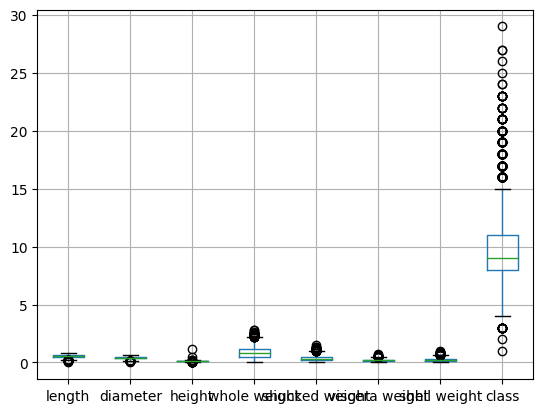

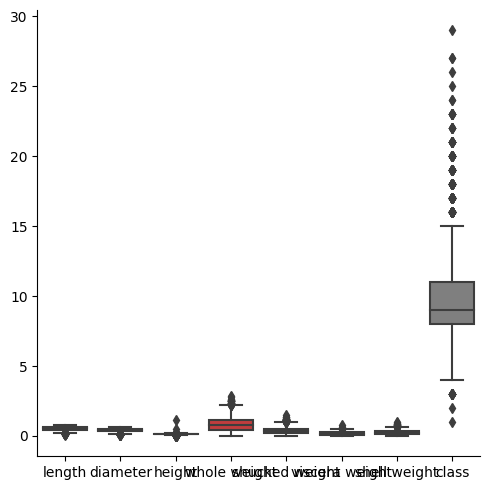

In [ ]:
#Duas formas diferentes de visualizar os boxplots
data.boxplot()
sb.catplot(kind = 'box', data = data)

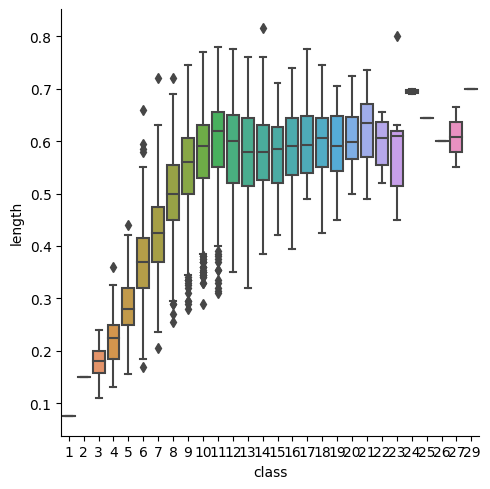

In [ ]:
#Visualizar boxplots da variável 'sepal length' para cada uma das classes
sb.catplot(y = 'sepal length', x = 'class', kind = 'box', data = data) #iris
# sb.catplot(y = 'length', x = 'class', kind = 'box', data = data) #abalone

# Visualizar gráficos pairwise (2 varíaveis por vez em um plano).

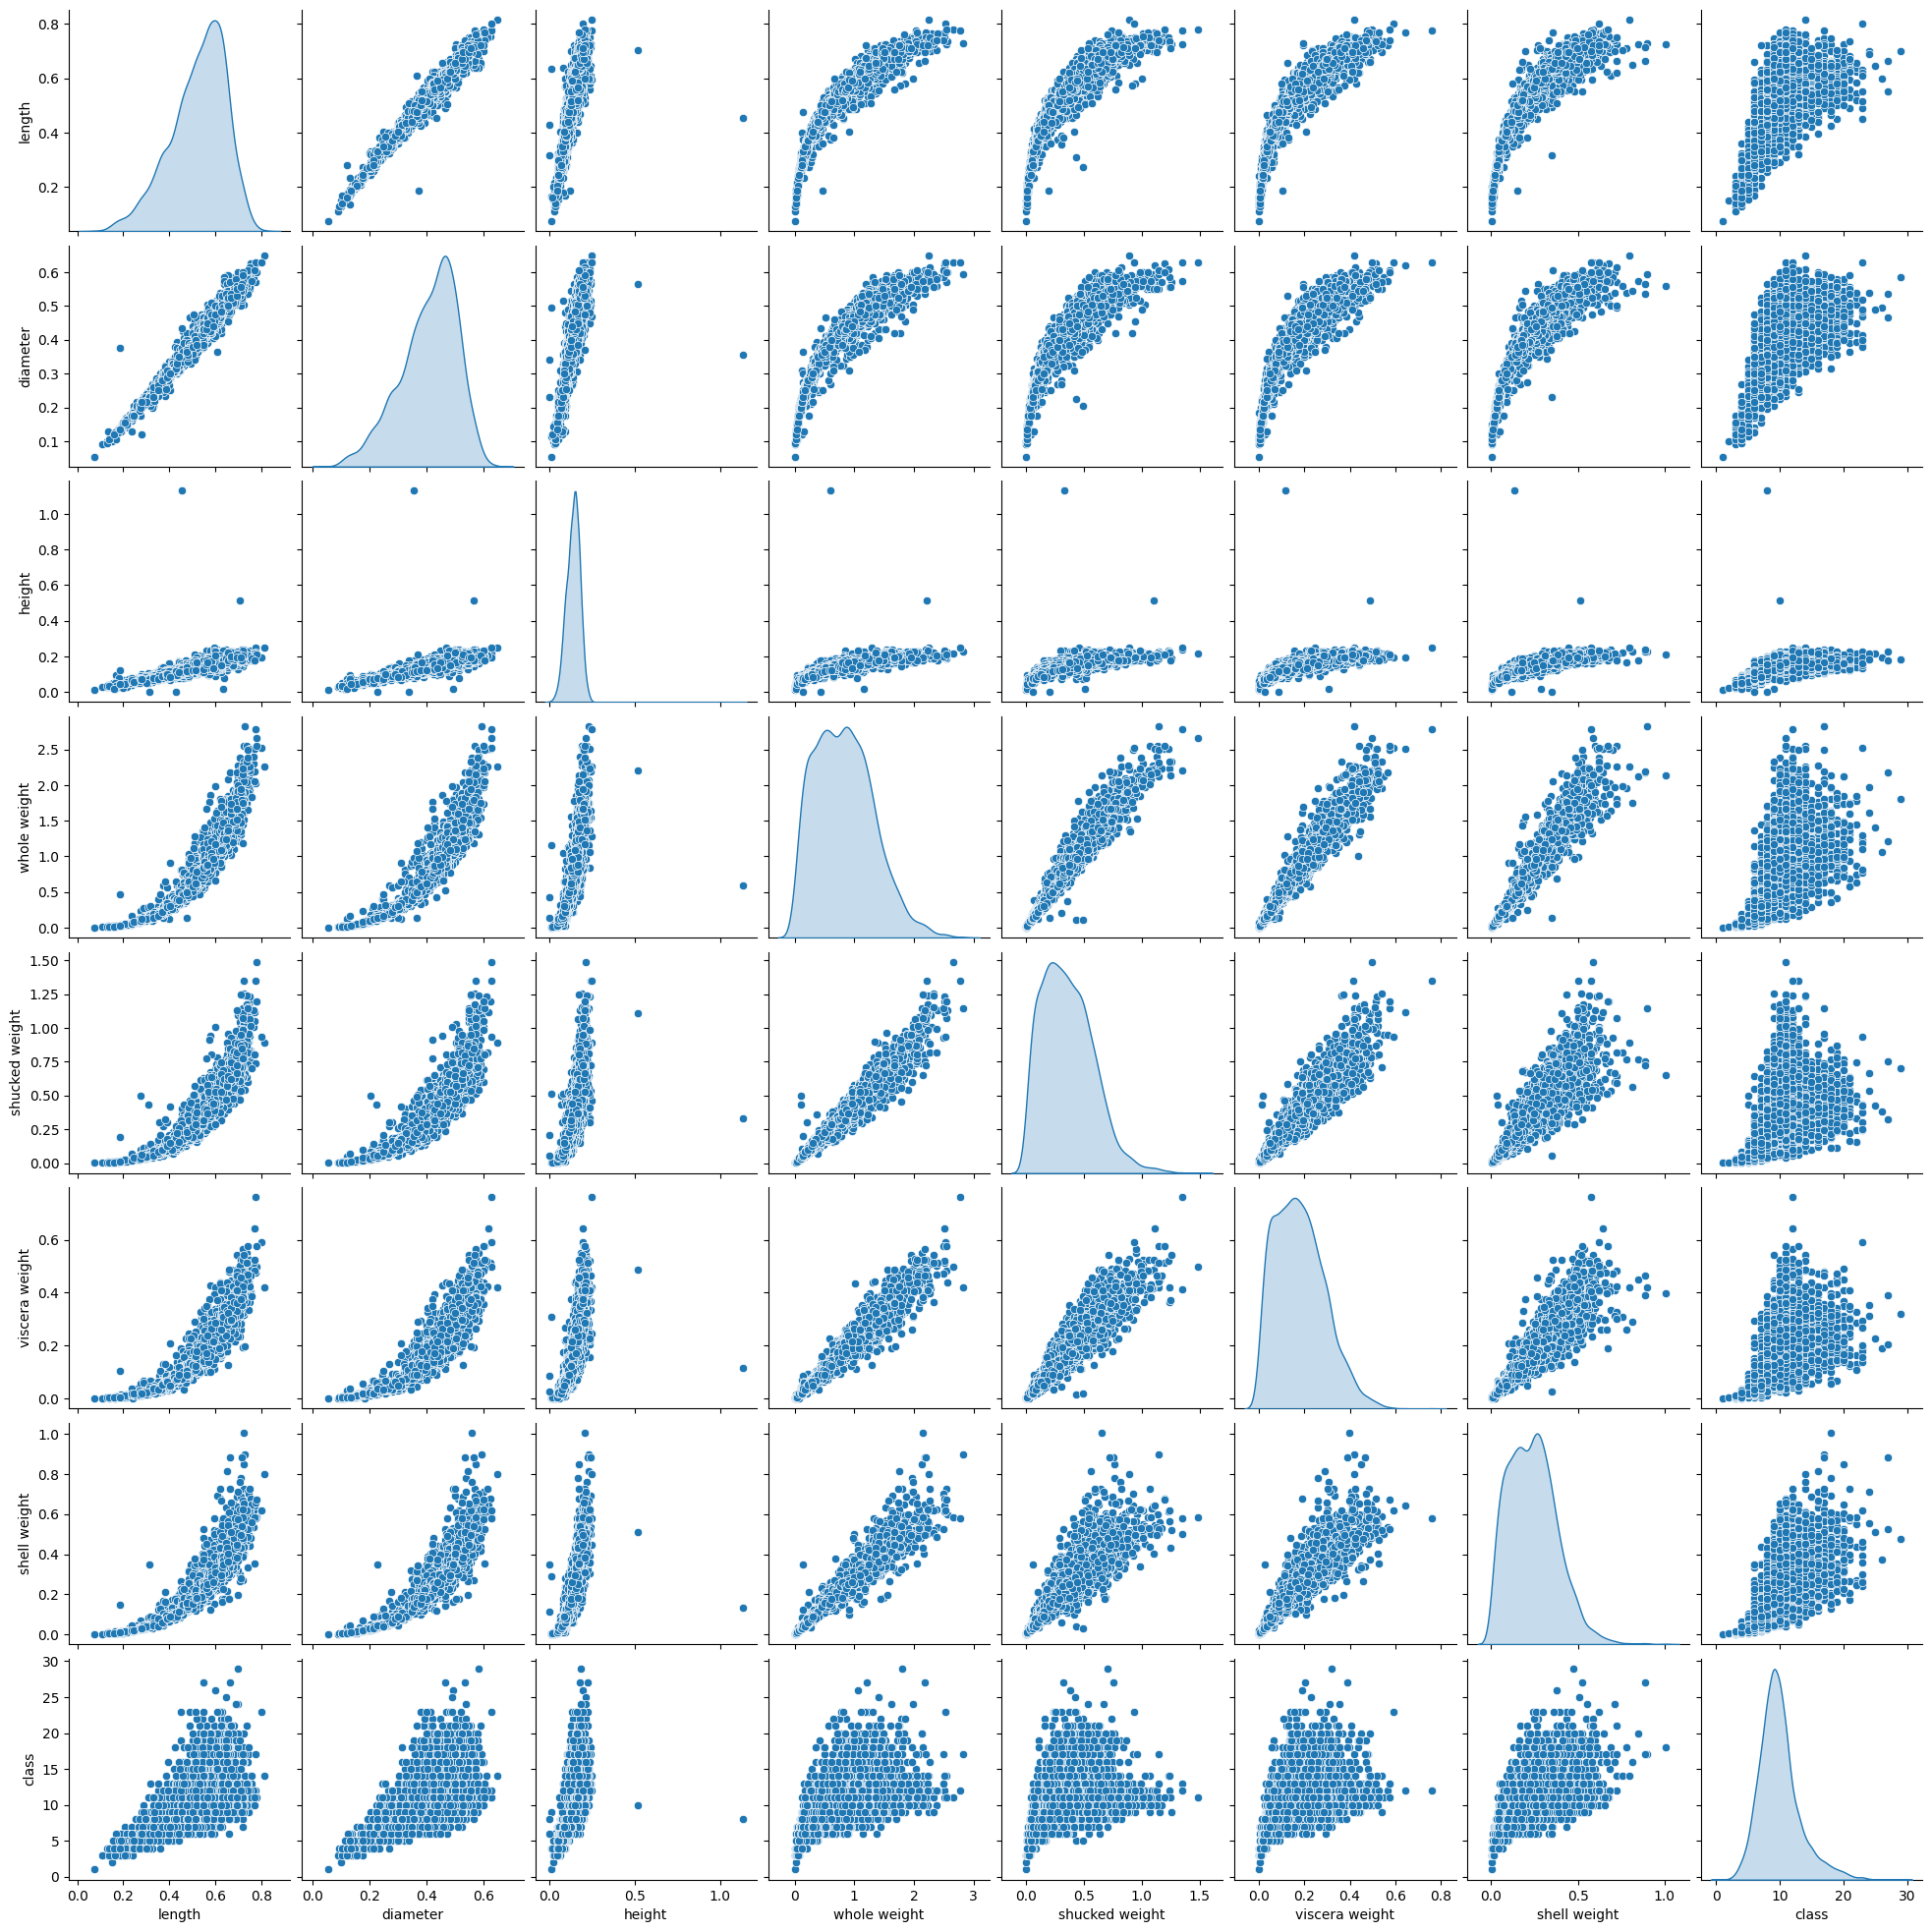

In [ ]:
#Visualizar gráficos pairwise (2 varíaveis por vez em um plano).
#hue coloca cor nos pontos conforme a classe que eles pertencem
#Na diagonal principal é mostrado
#kde --> estimativa da função de distribuição da variável
#hist --> histograma da variável

# sb.pairplot(data, hue="class", diag_kind = 'kde')
sb.pairplot(data, diag_kind = 'kde')

# Mostrar o mapa de calor das variáveis


<Axes: >

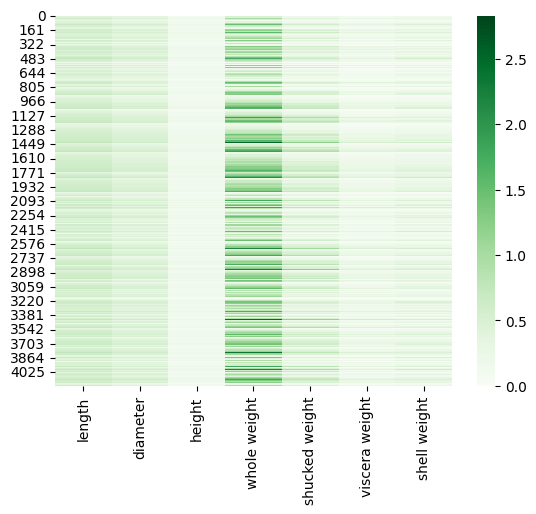

In [ ]:
#Mostrar o mapa de calor das variáveis
sb.heatmap(data.iloc[:,faixa], cmap = 'Greens')

# Visualizar mapa de calor para cada classe

<ipython-input-60-db002efd40c4>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.subplots(figsize=(10,4))


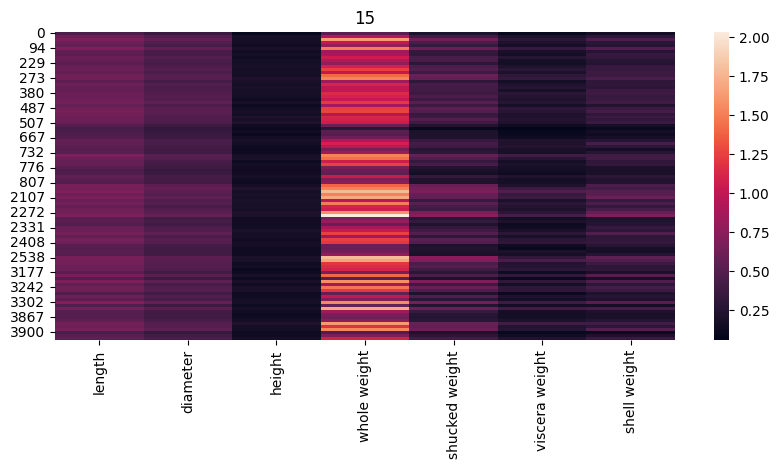

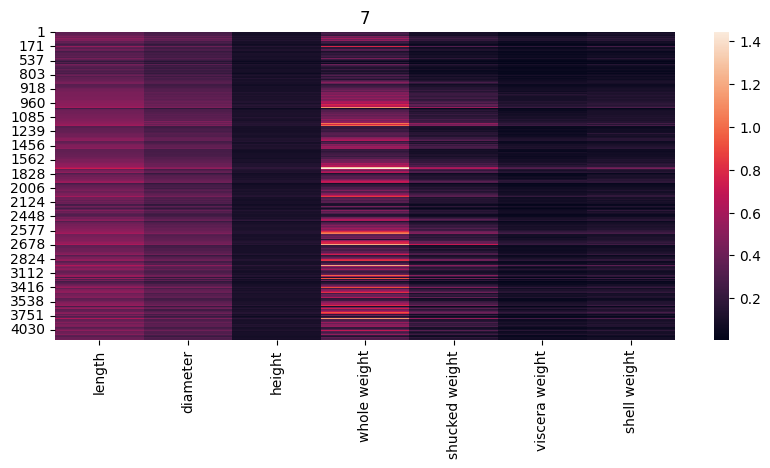

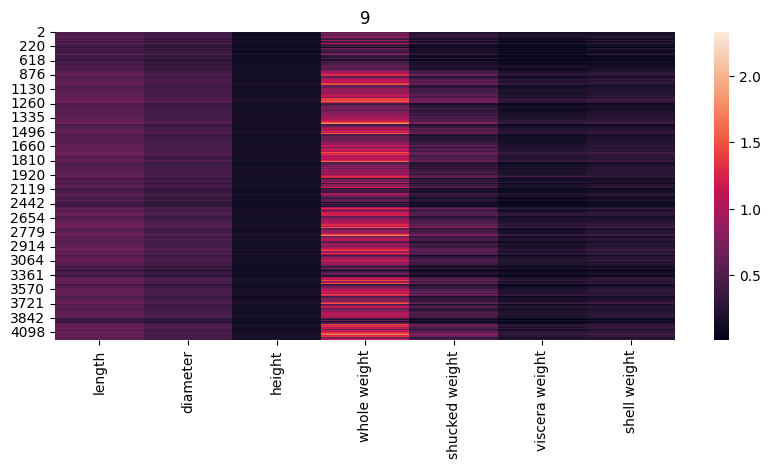

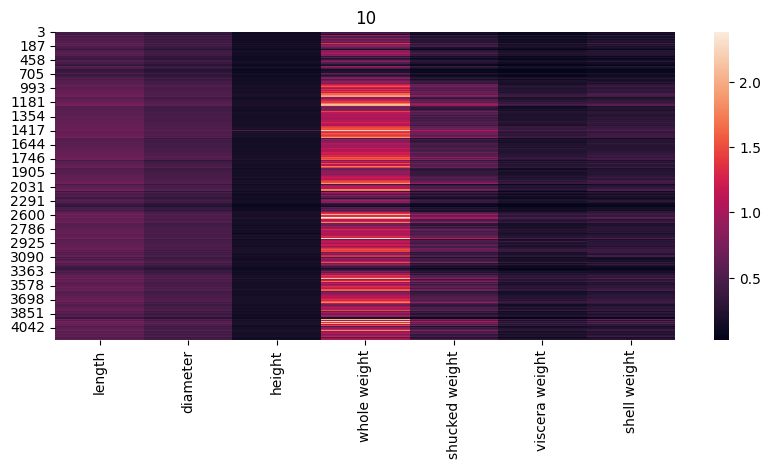

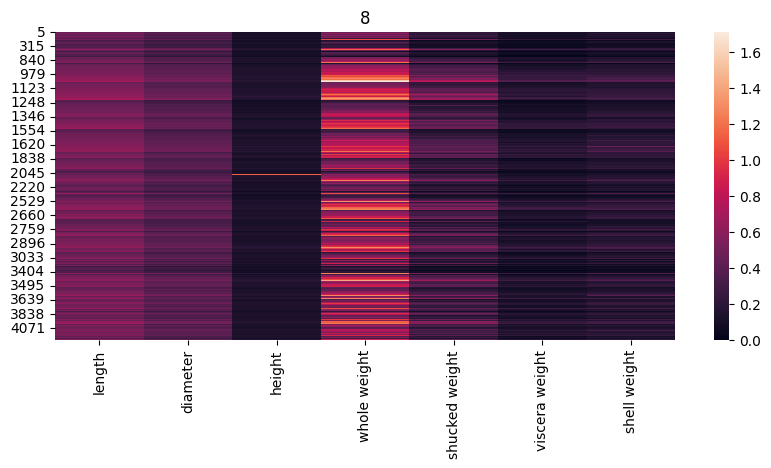

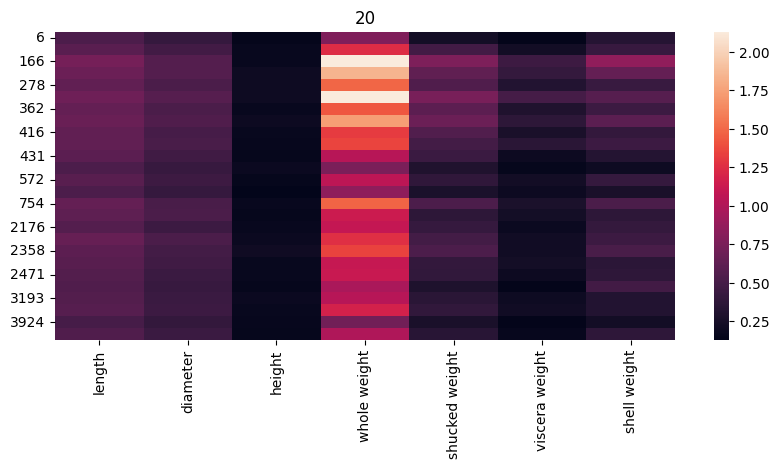

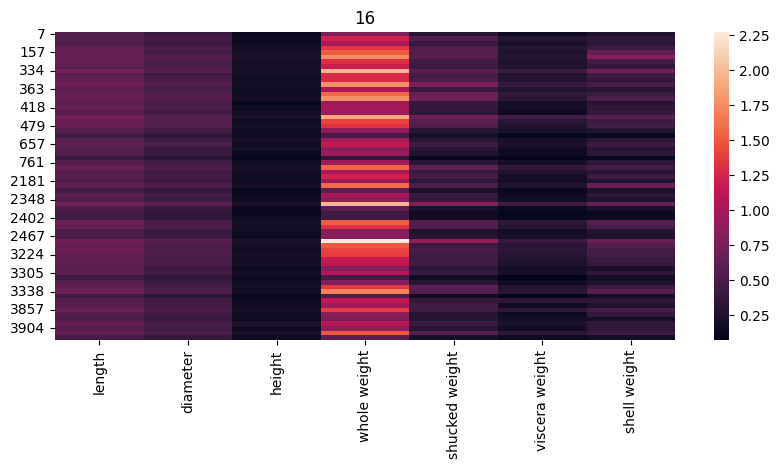

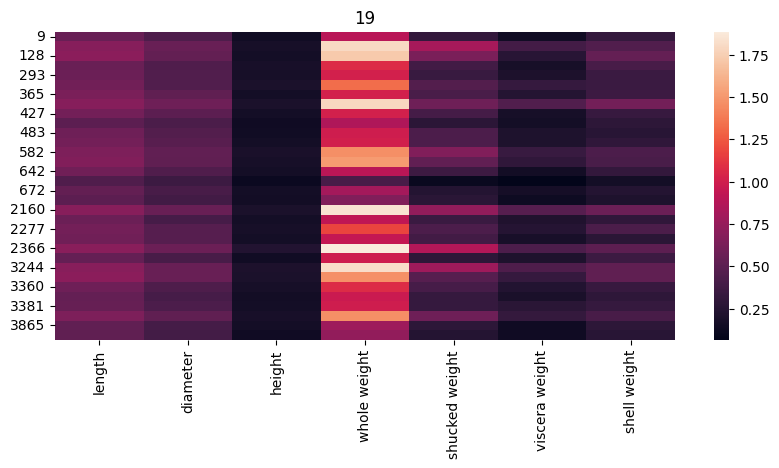

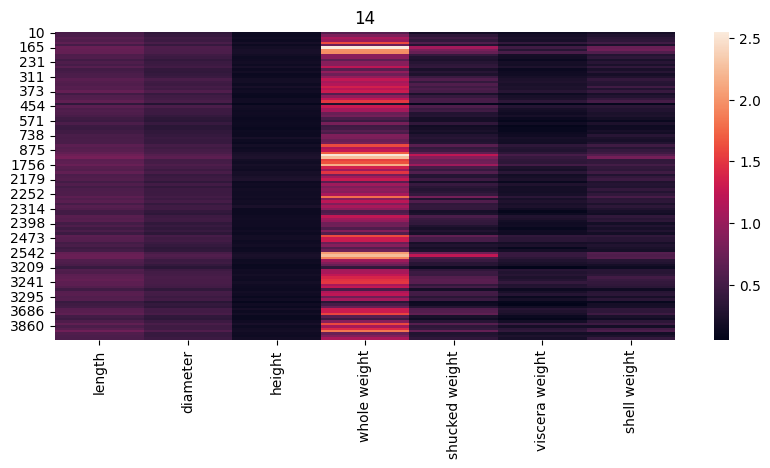

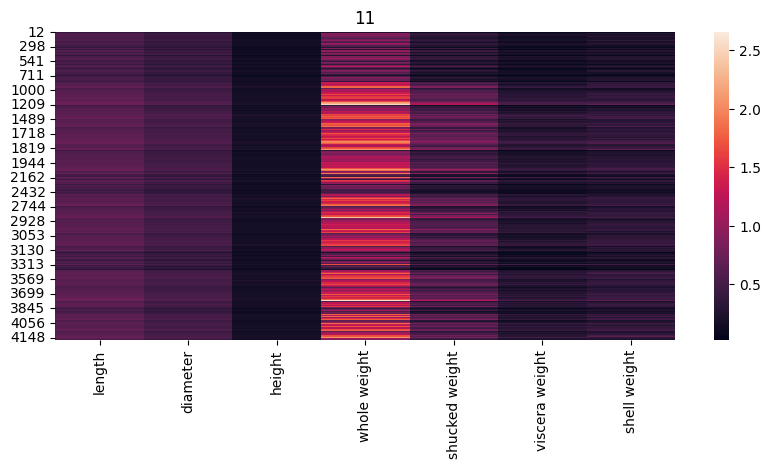

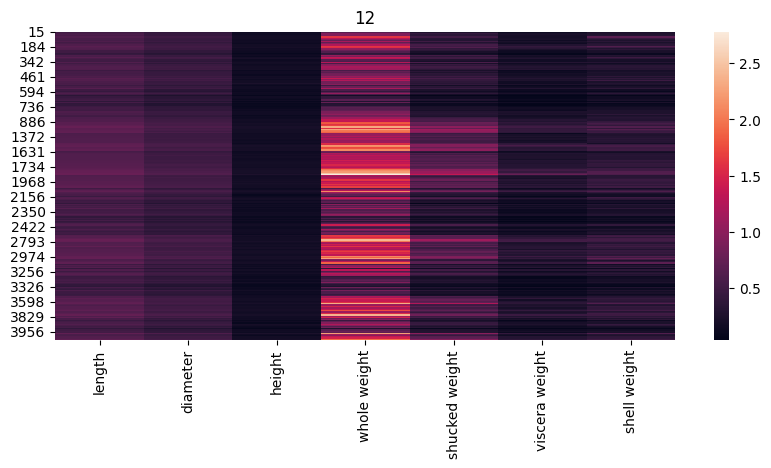

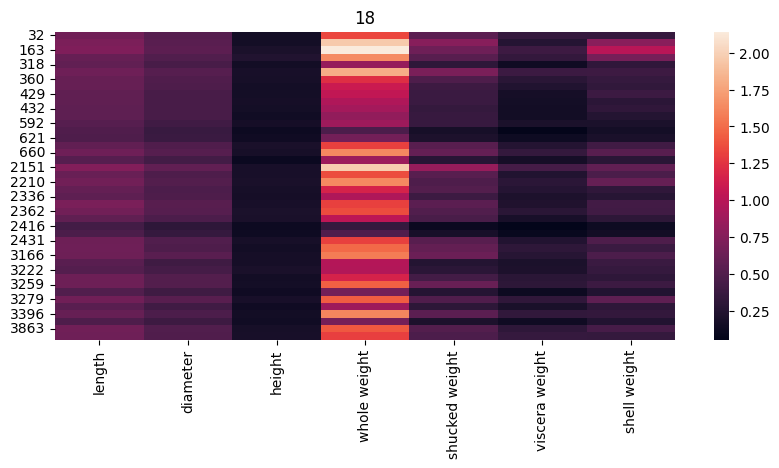

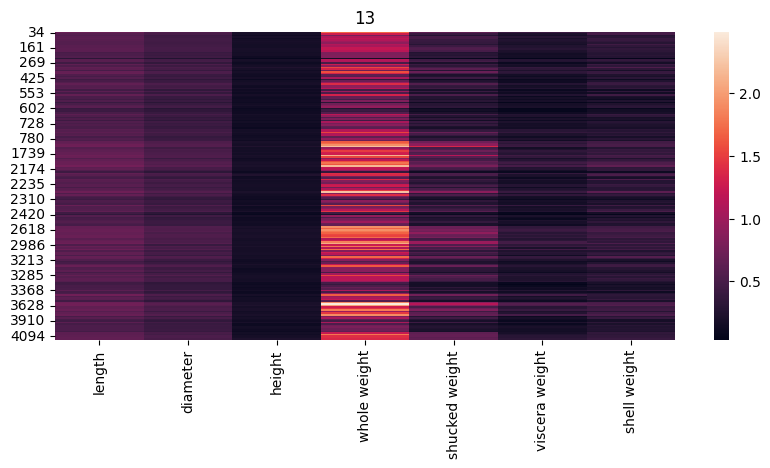

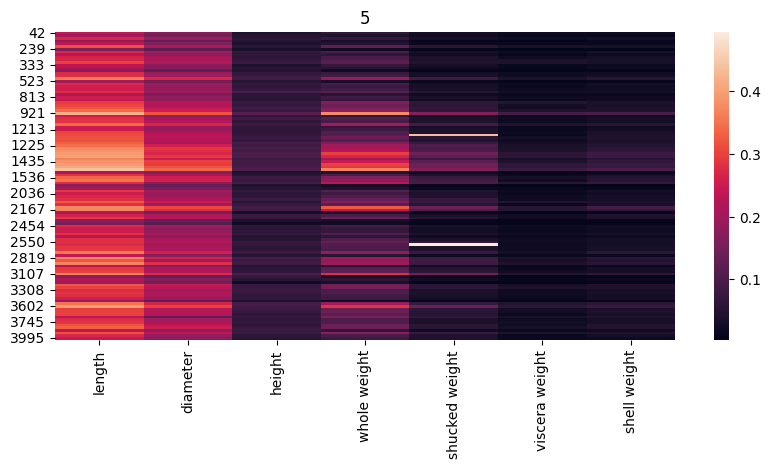

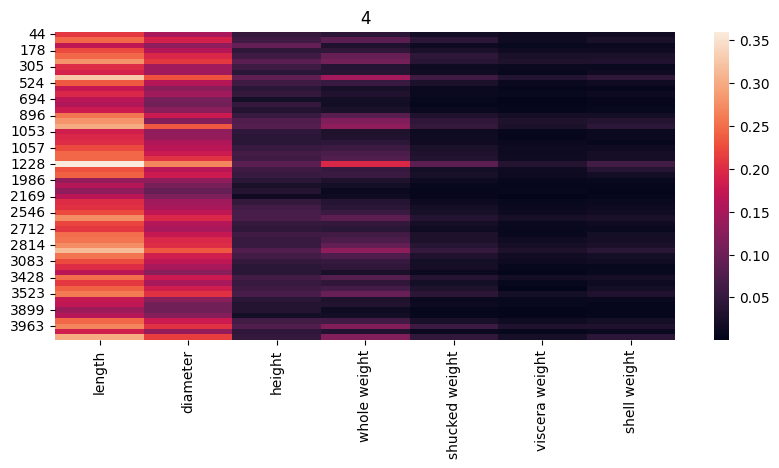

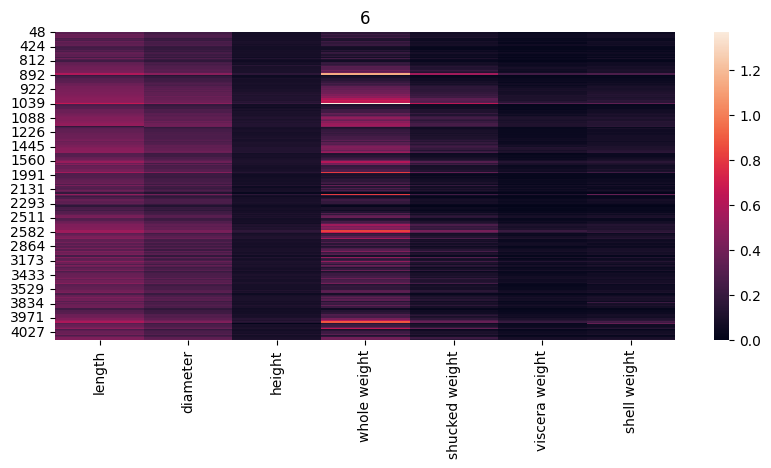

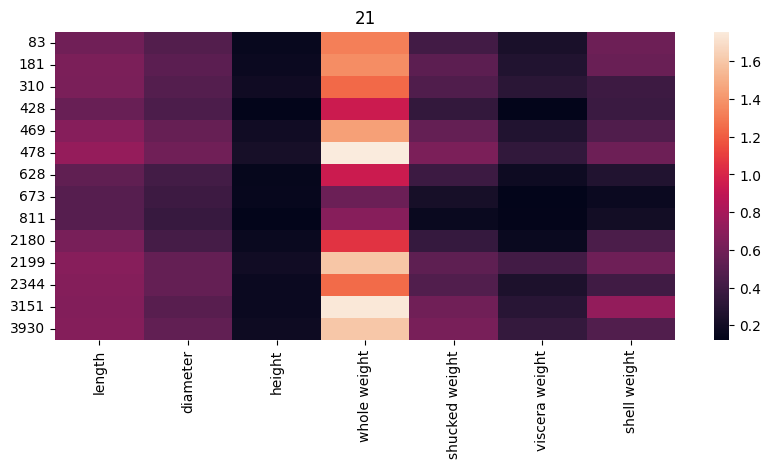

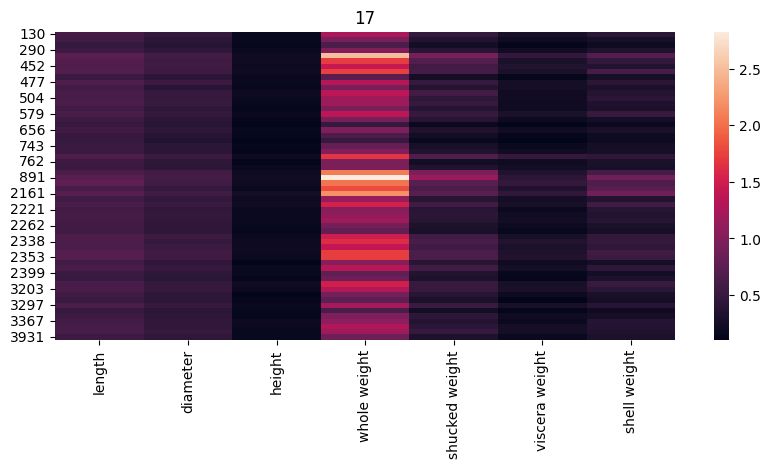

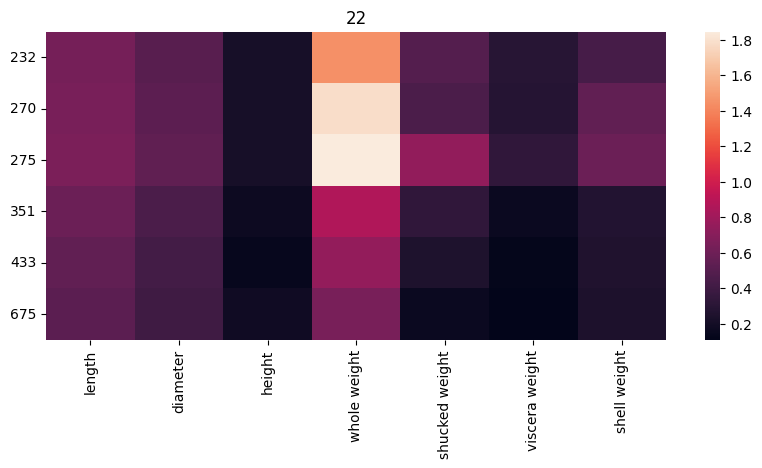

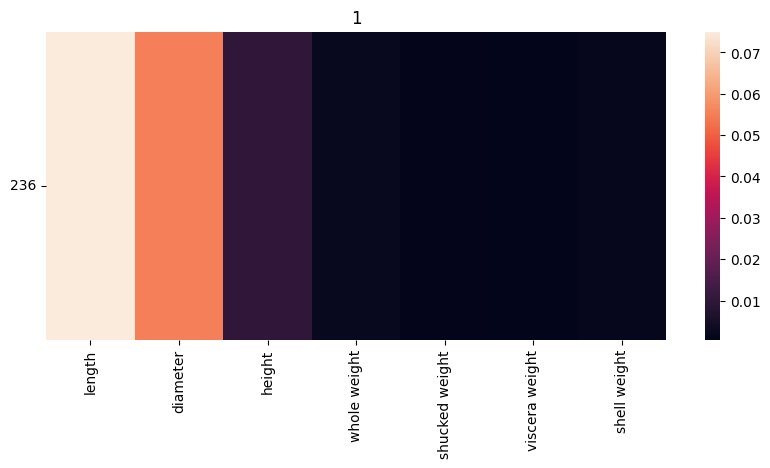

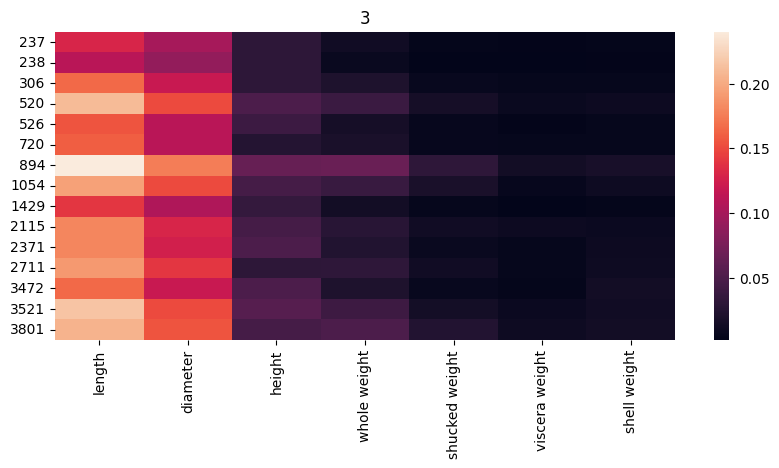

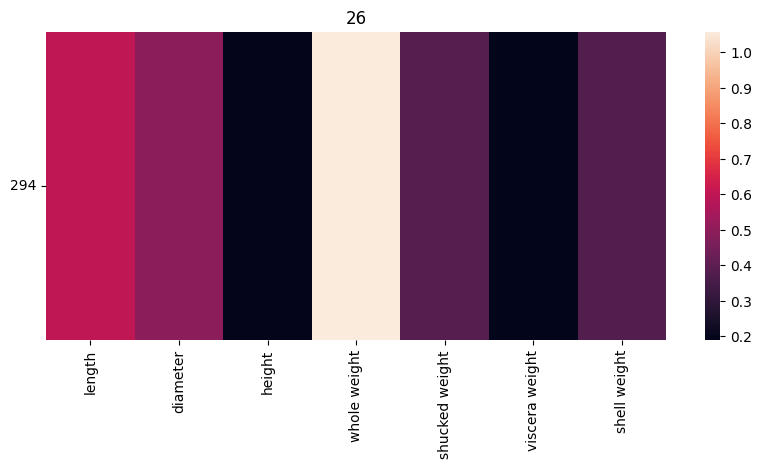

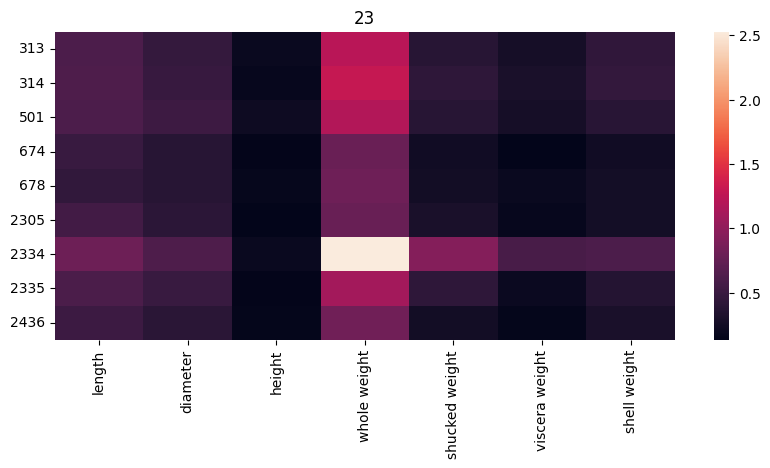

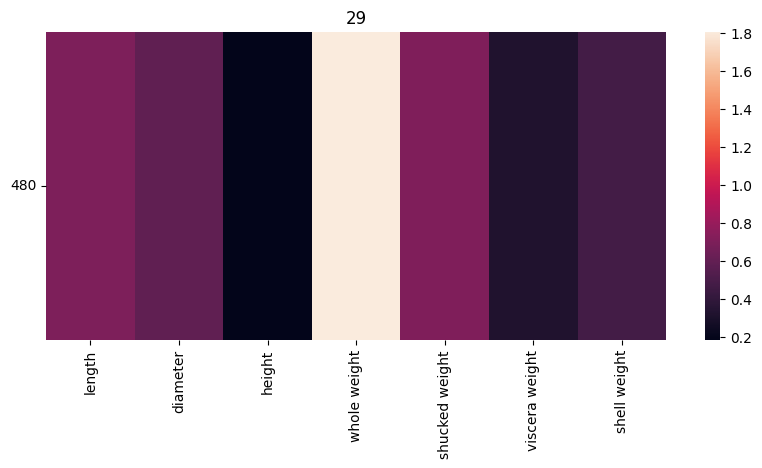

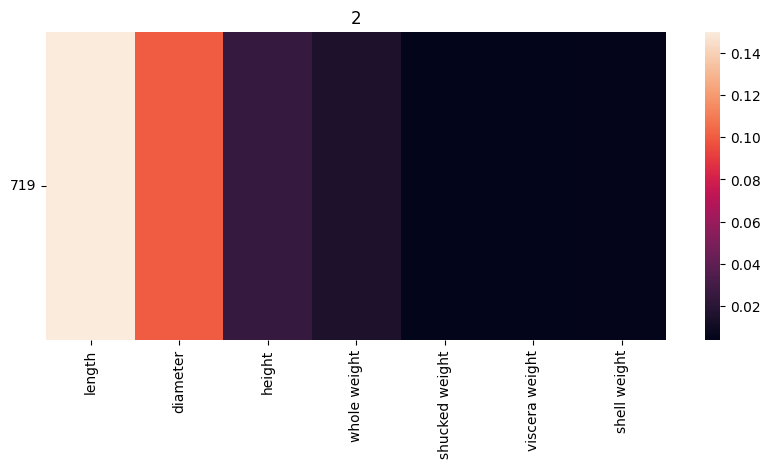

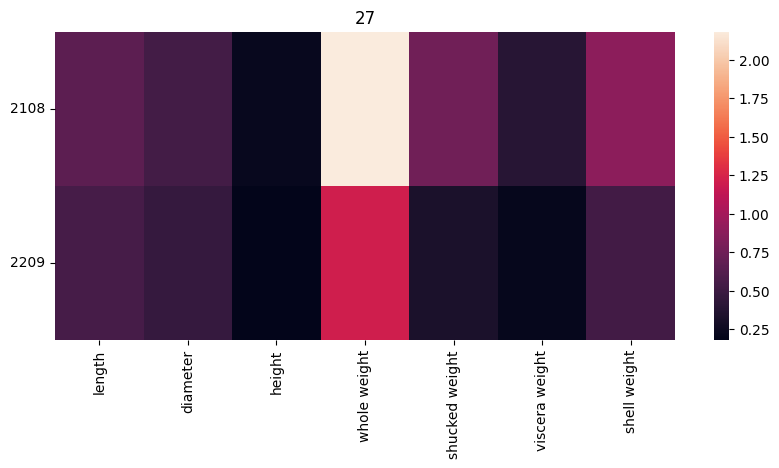

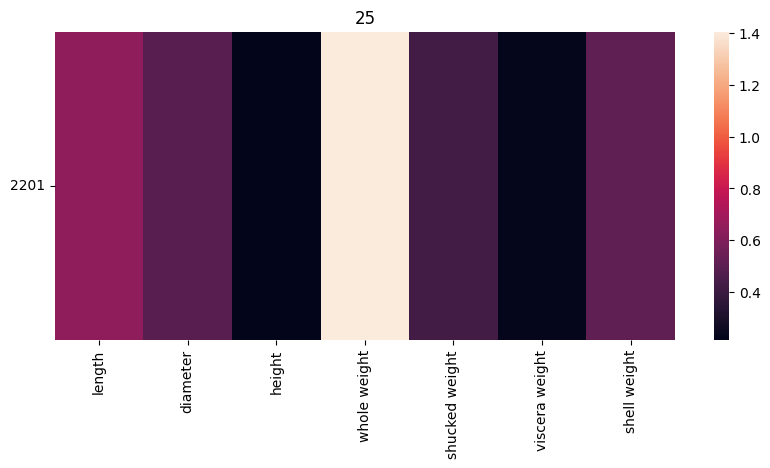

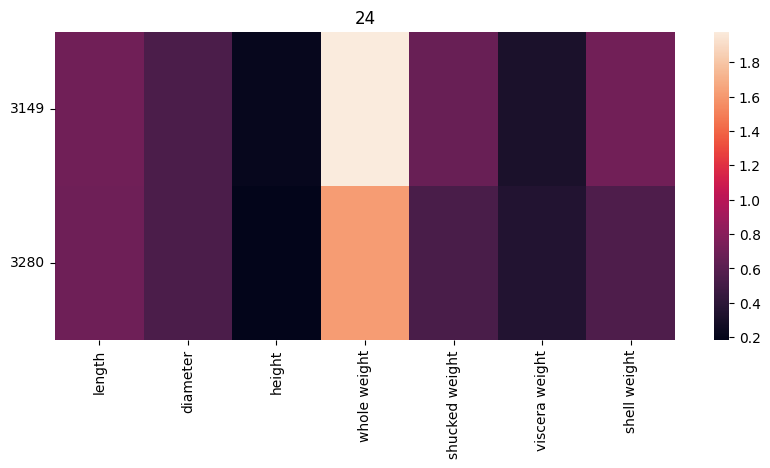

In [ ]:
#Visualizar mapa de calor para cada classe

#Este comando serve para pegar as classes únicas
classes = data['class'].unique()

for i in range(0,classes.size):
  data_select = data[data['class'] == classes[i]]
  fig = plt.subplots(figsize=(10,4))
  sb.heatmap(data_select.iloc[:,faixa], vmin = np.min(data_select.iloc[:,faixa].min()), vmax = np.max(data_select.iloc[:,faixa].max()))
  # sb.heatmap(data_select.iloc[:,faixa], vmin = 0, vmax = 8)
  plt.title(classes[i])
  plt.yticks(rotation = 0)

# montagem google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aplicar PCA para visualizar os dados em 2D

[3.38170727e-01 3.96403025e-03 2.90771416e-03 1.05490434e-03
 1.48141736e-04 4.89663867e-04 4.26787482e-04]
[[-1.93156059e-01  3.50069286e-01 -6.55435958e-01 -3.87845990e-02
  -6.20285186e-01  1.55845008e-01  5.60615302e-04]
 [-1.59552075e-01  3.18820741e-01 -5.05473077e-01  1.80604524e-02
   7.81379947e-01  7.48357409e-02 -3.02034552e-02]
 [-5.92827068e-02  1.34751753e-01 -8.60795787e-02  4.68325197e-03
  -4.73954978e-02 -9.24448472e-01 -3.37704883e-01]
 [-8.42619224e-01  1.88240197e-02  3.11470276e-01 -1.27977156e-01
  -6.24787436e-03  1.67979449e-01 -3.84695312e-01]
 [-3.71958945e-01 -7.03431694e-01 -3.37272496e-01  3.53767145e-01
   1.25725048e-02 -1.62443835e-01  3.18402885e-01]
 [-1.82251024e-01  1.29477099e-02  2.50613453e-02 -7.62977566e-01
   3.37328611e-02 -2.07282449e-01  5.82880918e-01]
 [-2.28349259e-01  5.12160776e-01  3.09994257e-01  5.23911759e-01
  -3.33215094e-02 -1.33924825e-01  5.43986951e-01]]


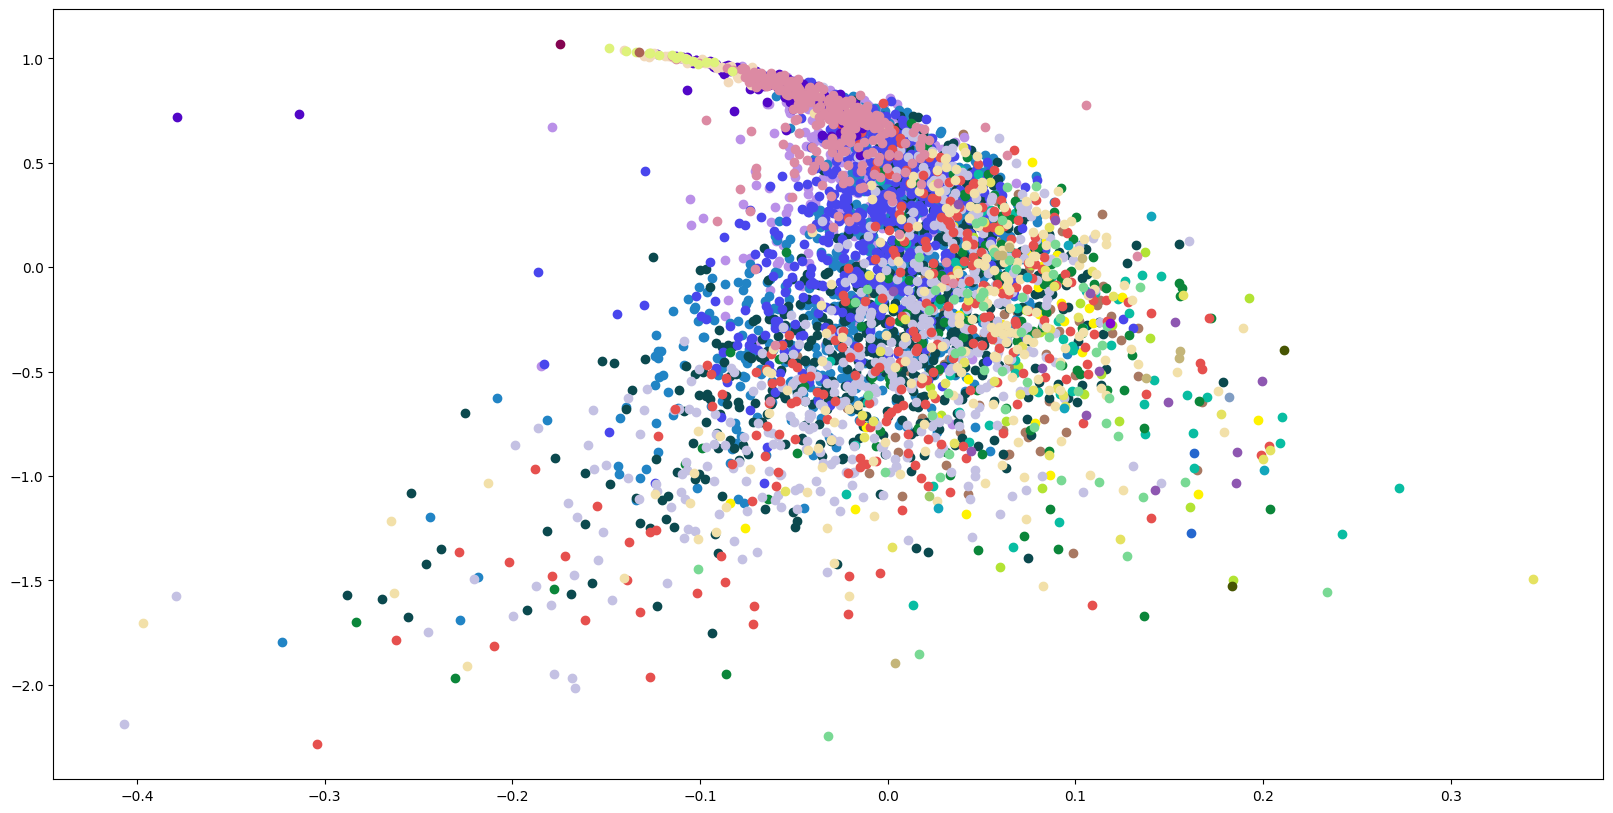

In [ ]:
#Obter autovalores (eigValues) e autovetores (eigVectors)
#Compare os gráficos com matriz de covariância e matriz de coef. de correlação

#Usando matriz de covariância
eigValues, eigVectors = np.linalg.eig(data.iloc[:,faixa].cov()) # calculamos os autovalores e autovetores da matriz de covariância
print(eigValues)
print(eigVectors)

#Subtrair dos dados a média
new_data = data.iloc[:,faixa] - data.iloc[:,faixa].mean() # IMPORTANTE


# #Usando matriz de coef. de correlação
# eigValues, eigVectors = np.linalg.eig(data.iloc[:,faixa].corr())
# print(eigValues)
# print(eigVectors)

# #Subtrair dos dados a média e divide pelo desvio padrão
# new_data = (data.iloc[:,faixa] - data.iloc[:,faixa].mean())/data.iloc[:,faixa].std()

#Seleciona os dois autovetores associados aos maiores autovalores
#M será a matriz de projeção dos dados
M = eigVectors[:,0:2]

#Projeta os dados nos autovetores principais
proj_data = new_data @ M

classes = data['class'].unique()

#Plota o gráfico
color = ['or','ob','og']
plt.figure(figsize=(20,10))
for i in range(0,classes.size):
  data_select = proj_data[data['class'] == classes[i]]
  # plt.plot(data_select[1],data_select[0],color[i]) #Iris
  plt.plot(data_select[1],data_select[0],marker='o',linestyle='',color = np.random.uniform(0,1,3)) #Abalone

##Pré-processamento de Dados

In [ ]:
#Observe a presença de NaN na base de dados (em linhas e colunas)
data = pd.read_csv('/content/drive/MyDrive/AirQualityUCI.csv', sep = ';', thousands=',')
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-36.996687,1048.990061,-159.090093,18.656834,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,168.190232,465.260981,9846.342524,NaN,NaN
std,211.793927,329.832710,139.789093,413.802064,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,114.081191,216.407635,4447.196714,NaN,NaN
min,-2000.000000,-200.000000,-200.000000,-2000.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,4.000000,921.000000,-200.000000,40.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,109.000000,341.000000,6923.000000,NaN,NaN
50%,14.000000,1053.000000,-200.000000,79.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,172.000000,486.000000,9768.000000,NaN,NaN
75%,25.000000,1221.000000,-200.000000,136.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000,NaN,NaN
max,119.000000,2040.000000,1189.000000,637.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,446.000000,887.000000,22310.000000,NaN,NaN


In [ ]:
#O comando data.fillna(-100) preenche NaN com o valor -100
data.fillna(-100)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0,-100.0,-100.0
1,10/03/2004,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0,-100.0,-100.0
2,10/03/2004,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0,-100.0,-100.0
3,10/03/2004,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0,-100.0,-100.0
4,10/03/2004,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,-100,-100,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9467,-100,-100,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9468,-100,-100,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9469,-100,-100,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [ ]:
#Removendo NaN
#O comando data.dropna(axis=1,how = 'all') remove colunas que tenham somente NaN
dataNoNan = data.dropna(axis=1,how = 'all')
#O comando data.dropna(axis=0,how = 'all') remove linhas que tenham somente NaN
dataNoNan = dataNoNan.dropna(axis=0,how = 'all')
dataNoNan
#Observe que o número de linhas reduziu para 9357 e colunas para 15

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,31.0,1314.0,-200.0,135.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,219.0,293.0,7568.0
9353,04/04/2005,11.00.00,24.0,1163.0,-200.0,114.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,243.0,237.0,7119.0
9354,04/04/2005,12.00.00,24.0,1142.0,-200.0,124.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,269.0,183.0,6406.0
9355,04/04/2005,13.00.00,21.0,1003.0,-200.0,95.0,961.0,235.0,702.0,156.0,1041.0,770.0,283.0,135.0,5139.0


In [ ]:
#Os valores iguais a -200 são valores que estão faltando.
#Podemos remover as amostras com valores faltantes
dataNoNan.replace(-200,np.nan).dropna()
#Observe que não é uma boa estratégia, pois reduz substancialmente a base de dados

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,30/04/2004,20.00.00,44.0,1449.0,501.0,195.0,1282.0,254.0,625.0,133.0,2100.0,1569.0,191.0,611.0,13345.0
1227,30/04/2004,21.00.00,31.0,1363.0,234.0,151.0,1152.0,189.0,684.0,110.0,1951.0,1495.0,182.0,654.0,13529.0
1228,30/04/2004,22.00.00,3.0,1371.0,212.0,146.0,1136.0,174.0,689.0,102.0,1927.0,1471.0,181.0,661.0,13579.0
1229,30/04/2004,23.00.00,31.0,1406.0,275.0,137.0,1107.0,167.0,718.0,108.0,1872.0,1384.0,177.0,669.0,13422.0


In [ ]:
#Podemos preencher os valores que estão faltando com a média
dataNoNan = dataNoNan.replace(-200,dataNoNan.mean())
dataNoNan

<ipython-input-71-d2122692d4b2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataNoNan = dataNoNan.replace(-200,dataNoNan.mean())


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.0,1360.0,150.000000,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.0,1292.0,112.000000,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.0,1402.0,88.000000,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.0,1376.0,80.000000,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.0,1272.0,51.000000,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,31.0,1314.0,-159.090093,135.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,219.0,293.0,7568.0
9353,04/04/2005,11.00.00,24.0,1163.0,-159.090093,114.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,243.0,237.0,7119.0
9354,04/04/2005,12.00.00,24.0,1142.0,-159.090093,124.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,269.0,183.0,6406.0
9355,04/04/2005,13.00.00,21.0,1003.0,-159.090093,95.0,961.0,235.0,702.0,156.0,1041.0,770.0,283.0,135.0,5139.0


In [ ]:
#Amostras redundantes podem ser removidas
dataNoNan = dataNoNan.drop_duplicates()
dataNoNan.shape
#Como o tamanho não reduziu, não havia amostras redundantes

(9357, 15)

In [ ]:
#Amostras redundantes podem ser removidas baseadas em um valor de variável, por exemplo, Time
dataNoNan = dataNoNan.drop_duplicates('Time')
dataNoNan

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26.000000,1360.0,150.0,119.0,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,136.0,489.0,7578.0
1,10/03/2004,19.00.00,2.000000,1292.0,112.0,94.0,955.0,103.000000,1174.0,92.000000,1559.0,972.0,133.0,477.0,7255.0
2,10/03/2004,20.00.00,22.000000,1402.0,88.0,90.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,119.0,540.0,7502.0
3,10/03/2004,21.00.00,22.000000,1376.0,80.0,92.0,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,110.0,600.0,7867.0
4,10/03/2004,22.00.00,16.000000,1272.0,51.0,65.0,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,112.0,596.0,7888.0
5,10/03/2004,23.00.00,12.000000,1197.0,38.0,47.0,750.0,89.000000,1337.0,96.000000,1393.0,949.0,112.0,592.0,7848.0
6,11/03/2004,00.00.00,12.000000,1185.0,31.0,36.0,690.0,62.000000,1462.0,77.000000,1333.0,733.0,113.0,568.0,7603.0
7,11/03/2004,01.00.00,1.000000,1136.0,31.0,33.0,672.0,62.000000,1453.0,76.000000,1333.0,730.0,107.0,600.0,7702.0
8,11/03/2004,02.00.00,9.000000,1094.0,24.0,23.0,609.0,45.000000,1579.0,60.000000,1276.0,620.0,107.0,597.0,7648.0
9,11/03/2004,03.00.00,6.000000,1010.0,19.0,17.0,561.0,168.616971,1705.0,58.148873,1235.0,501.0,103.0,602.0,7517.0


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,-3.700743e-17,-9.251859e-18,1.110223e-16,-6.476301e-17,-2.220446e-16,2.220446e-16,-2.775558e-16,-2.035409e-16,4.440892e-16,1.850372e-17,-3.700743e-17,-4.440892e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.695733e+00,-1.798976e+00,-1.287381e+00,-1.488932e+00,-1.708374e+00,-1.701984e+00,-1.224719e+00,-2.157775e+00,-1.615159e+00,-1.713735e+00,-1.931703e+00,-1.647351e+00
25%,-4.353749e-01,-7.299164e-01,-7.843522e-01,-8.596020e-01,-7.742600e-01,-6.202218e-01,-7.925733e-01,-5.539897e-01,-7.220652e-01,-7.234436e-01,-3.977035e-01,-4.508071e-01
50%,1.945144e-01,1.771642e-01,-8.011198e-02,4.460768e-02,1.716219e-01,4.342716e-03,-3.825422e-01,1.121980e-01,7.639598e-02,2.127775e-01,3.787652e-02,-2.281252e-01
75%,6.761945e-01,8.534251e-01,4.843980e-01,8.113774e-01,8.174106e-01,8.038298e-01,5.665187e-01,6.879157e-01,7.580453e-01,7.865259e-01,3.787652e-01,6.878396e-02
max,1.194927e+00,1.375806e+00,2.200285e+00,1.636017e+00,1.433778e+00,2.004582e+00,2.221386e+00,1.362328e+00,1.626002e+00,1.674684e+00,2.310468e+00,2.319355e+00


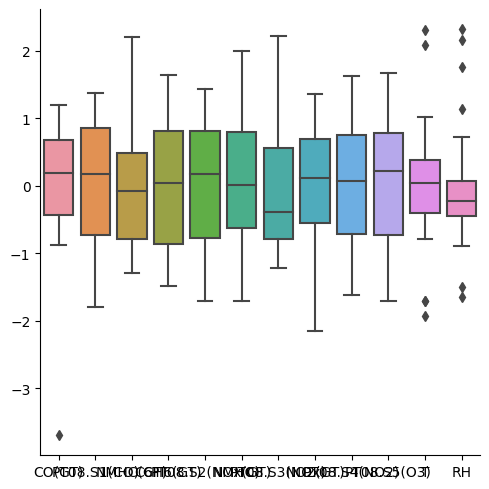

In [ ]:
#Aplicando uma padronização Z-Score para cada variável da base de dados
f = lambda x: (x - x.mean())/x.std()
dataNoNan2 = dataNoNan.iloc[:,2:-1]
sb.catplot(kind = 'box', data = dataNoNan2.apply(f))
dataNoNan2.apply(f).describe()

<ipython-input-75-62b7a8faa17e>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  f = lambda x: (x - x.median())/x.mad()
<ipython-input-75-62b7a8faa17e>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  f = lambda x: (x - x.median())/x.mad()
<ipython-input-75-62b7a8faa17e>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  f = lambda x: (x - x.median())/x.mad()
<ipython-input-75-62b7a8faa17e>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  f = lambda x: (x - x.median())/x.mad()
<ipython-input-75-62b7a8faa17e>:2: FutureWarning: The 'mad' 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,-0.287333,-0.210463,0.100899,-0.051815,-0.200152,-0.005303,0.465593,-0.141735,-0.088927,-0.248865,-0.055046,0.313712
std,1.477180,1.187955,1.259481,1.161564,1.166241,1.221173,1.217102,1.263261,1.164029,1.169604,1.453298,1.375175
min,-5.746596,-2.347565,-1.520532,-1.781305,-2.192528,-2.083719,-1.025015,-2.867567,-1.969019,-2.253257,-2.862385,-1.951684
25%,-0.930460,-1.077571,-0.886977,-1.050298,-1.103126,-0.762701,-0.499050,-0.841569,-0.929432,-1.095008,-0.633028,-0.306227
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.711528,0.803367,0.710989,0.890652,0.753145,0.976312,1.155104,0.727282,0.793460,0.671058,0.495413,0.408302
max,1.477789,1.423933,2.872116,1.848524,1.471979,2.442638,3.169247,1.579240,1.803787,1.709852,3.302752,3.503232


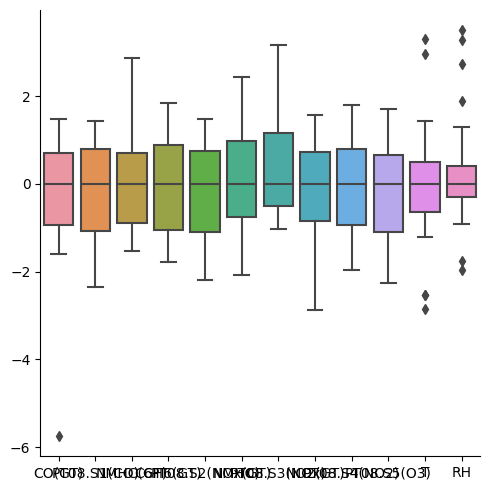

In [ ]:
#Aplicando uma padronização MAD para cada variável da base de dados
f = lambda x: (x - x.median())/x.mad()
dataNoNan2 = dataNoNan.iloc[:,2:-1]
sb.catplot(kind = 'box', data = dataNoNan2.apply(f))
dataNoNan2.apply(f).describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.755672,0.566645,0.369124,0.476466,0.543695,0.459181,0.355392,0.612986,0.498327,0.505762,0.455357,0.415294
std,0.204471,0.314982,0.286725,0.320005,0.318253,0.269792,0.290183,0.284083,0.308531,0.295123,0.235728,0.252098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666650,0.336735,0.144231,0.201389,0.297285,0.291850,0.125401,0.455607,0.275547,0.292258,0.361607,0.301647
50%,0.795444,0.622449,0.346154,0.490741,0.598315,0.460352,0.244385,0.644860,0.521898,0.568558,0.464286,0.357784
75%,0.893934,0.835459,0.508013,0.736111,0.803839,0.676047,0.519786,0.808411,0.732208,0.737884,0.544643,0.432635
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


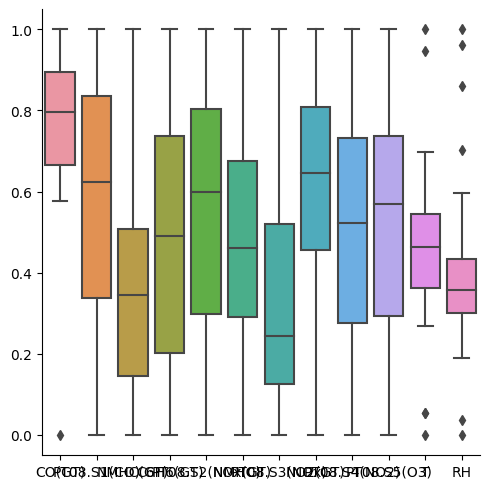

In [ ]:
#Aplicando uma normalização min-max para cada variável da base de dados
f = lambda x: (x - x.min())/(x.max() - x.min())
dataNoNan2 = dataNoNan.iloc[:,2:-1]
sb.catplot(kind = 'box', data = dataNoNan2.apply(f))
dataNoNan2.apply(f).describe()